In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pingouin import qqplot
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('D:\projects\ML Projects datasets\Startups.csv')

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data.shape

(50, 5)

In [5]:
data.size


250

In [6]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [8]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [10]:
data.State.value_counts(normalize=True)

New York      0.34
California    0.34
Florida       0.32
Name: State, dtype: float64

In [11]:
data.mean()



R&D Spend           73721.6156
Administration     121344.6396
Marketing Spend    211025.0978
Profit             112012.6392
dtype: float64

In [12]:
data.median()

R&D Spend           73051.080
Administration     122699.795
Marketing Spend    212716.240
Profit             107978.190
dtype: float64

In [14]:
data.std()

R&D Spend           45902.256482
Administration      28017.802755
Marketing Spend    122290.310726
Profit              40306.180338
dtype: float64

In [15]:
data.corr()#correlation of columns

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [40]:
data.cov()#covariance of columns

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,2.107017e+09,3.111739e+08,4.065495e+09,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Marketing Spend,4.065495e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.800007e+09,2.266673e+08,3.685779e+09,1.624588e+09


In [16]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


<AxesSubplot:ylabel='State'>

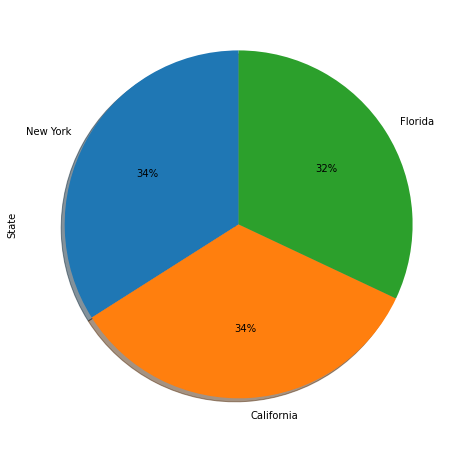

In [28]:
plt.figure(figsize=(8,8))
data.State.value_counts().plot.pie(autopct='%.0f%%',labels=data.State.unique(),shadow=True,startangle = 90)

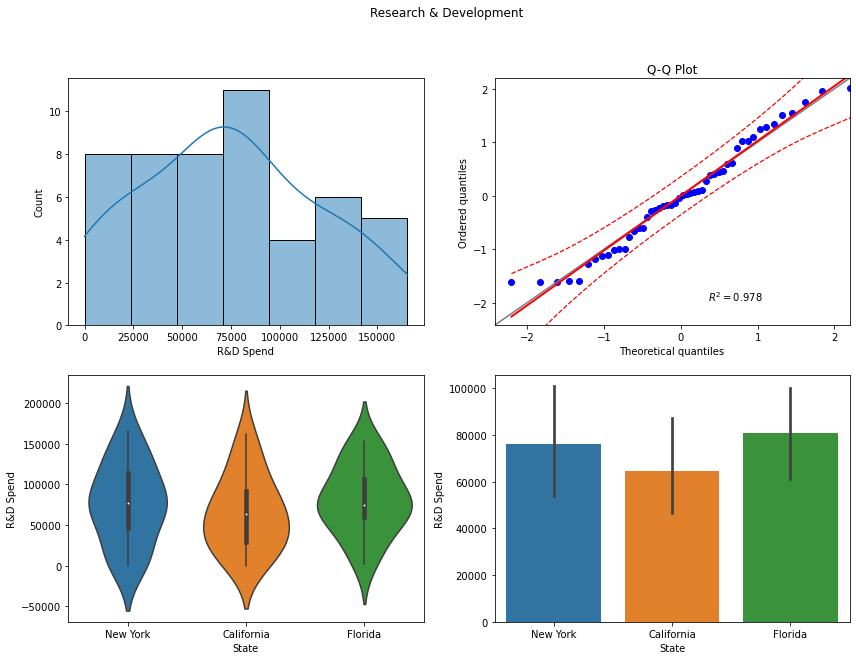

In [33]:
fig, axes = plt.subplots(2,2,figsize=(14,10))
sns.histplot(x = data['R&D Spend'], ax = axes[0][0],kde = True)
qqplot(data['R&D Spend'], dist='norm',ax = axes[0][1])
sns.violinplot(x = data.State,y = data['R&D Spend'], ax = axes[1][0])
sns.barplot(x = data.State,y = data['R&D Spend'], ax = axes[1][1])
plt.suptitle("Research & Development")
plt.show()

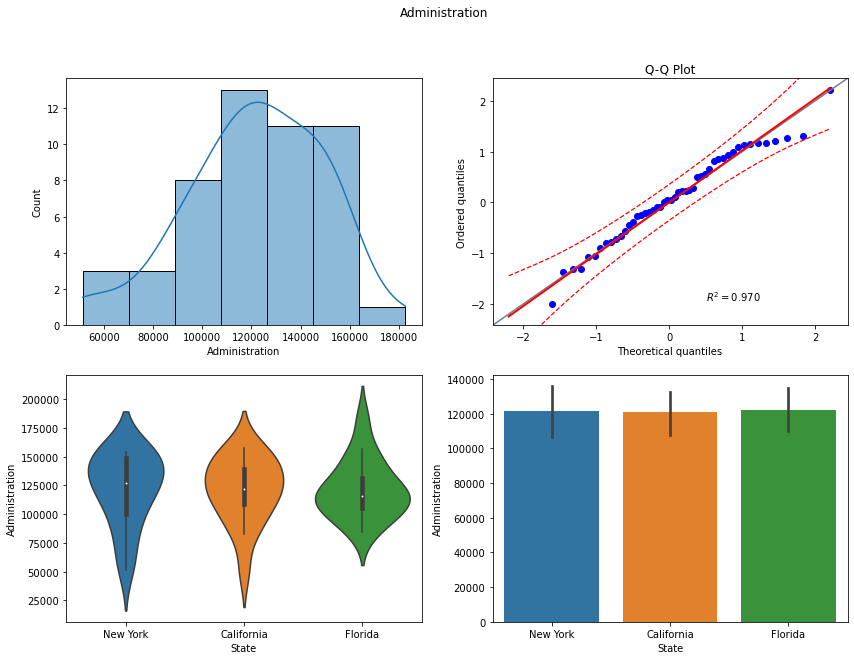

In [34]:
fig, axes = plt.subplots(2,2,figsize=(14,10))
sns.histplot(x = data['Administration'], ax = axes[0][0],kde = True)
qqplot(data['Administration'], dist='norm',ax = axes[0][1])
sns.violinplot(x = data.State,y = data['Administration'], ax = axes[1][0])
sns.barplot(x = data.State,y = data['Administration'], ax = axes[1][1])
plt.suptitle('Administration')
plt.show()

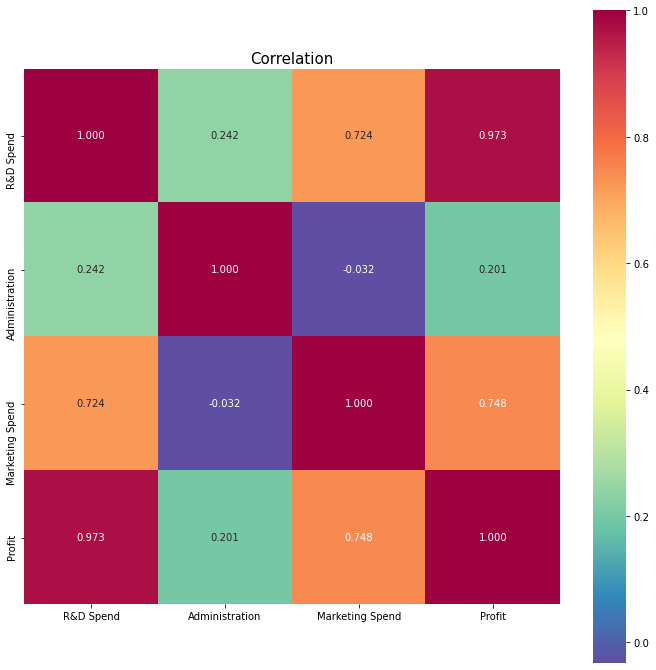

In [38]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True, fmt =".3f",square=True ,cmap='Spectral_r')
plt.title("Correlation",size = 15)
plt.show()


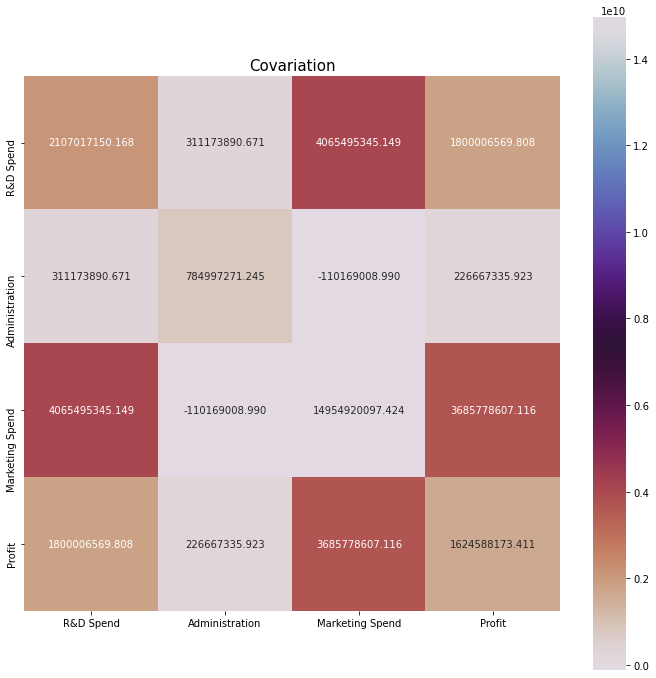

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(data.cov(), annot=True, fmt =".3f",square=True,cmap='twilight_r')
plt.title("Covariation",size = 15)
plt.show()

In [47]:
from sklearn.preprocessing import LabelEncoder

In [49]:
# encode the categorical values
label_encoder = LabelEncoder()
data.State = label_encoder.fit_transform(data.State)
data.State.unique()

array([2, 0, 1])

In [50]:
label_encoder.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [51]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [54]:
x =data.drop(['Profit'], axis=1)
y = data['Profit']

In [55]:
print(x.head())
y.head()

   R&D Spend  Administration  Marketing Spend  State
0  165349.20       136897.80        471784.10      2
1  162597.70       151377.59        443898.53      0
2  153441.51       101145.55        407934.54      1
3  144372.41       118671.85        383199.62      2
4  142107.34        91391.77        366168.42      1


0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [58]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression(normalize=True,n_jobs=-1)
lr_reg.fit(x_train , y_train)

LinearRegression(n_jobs=-1, normalize=True)

In [59]:
lr_reg.get_params(deep=True)


{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': True}

In [69]:
y_pred = lr_reg.predict(x_test)
y_pred


array([126720.66150723,  84909.08961913,  98890.31854876,  46479.31240248,
       129113.18318813,  50968.88397762, 109015.01626802, 100893.57078084,
        97713.73821431, 113085.59056068])

In [70]:
lr_reg.coef_

array([  0.80379465,  -0.06791023,   0.03126059, -16.82030683])

In [71]:
 lr_reg.intercept_


54080.71684612091

In [74]:
from yellowbrick.regressor import ResidualsPlot,prediction_error


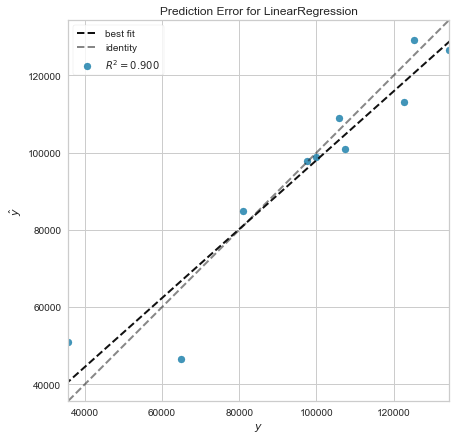

In [76]:
 plt.figure(figsize=(10,7))
visualizer = prediction_error(lr_reg, x_train, y_train, x_test, y_test)
visualizer.show()
plt.show()


In [80]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error,r2_score, mean_absolute_error

In [81]:
 print('MSE : %0.2f ' % mean_squared_error(y_test, y_pred))
print('MAE : %0.2f ' % mean_absolute_error(y_test, y_pred))
print('RMSE : %0.2f ' % mean_squared_error(y_test, y_pred)**0.5)
print('R2 : %0.2f ' % r2_score(y_test, y_pred))

MSE : 80929465.49 
MAE : 6979.18 
RMSE : 8996.08 
R2 : 0.90 
